### Taller 5

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [4]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [5]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(318, 10)
(80, 10)


Etiquetas

In [6]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [7]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [8]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [9]:
norm = tf.keras.layers.Normalization()

In [10]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [11]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [12]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [13]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 23.5811 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.0462 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.2547 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.9758 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.5309 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.7478 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.1997 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.3390 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.0250 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.3537 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.7264 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [15]:
hist.head()

,loss,val_loss,epoch
0,23.766933,20.898445,0
1,22.966938,20.098450,1
2,22.166946,19.298458,2
3,21.366953,18.498463,3
4,20.566957,17.698467,4


In [16]:
import matplotlib.pyplot as plt

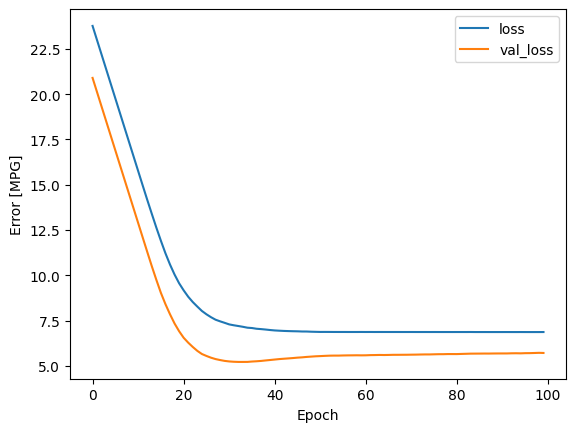

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

creación de 3 casos diferentes al modelo base

Modelo 1

In [18]:
model3_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [19]:
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [20]:
%%time
history31 = model3_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 24.4020 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.8481 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.2000 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.0361 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.9400 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.9101 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.3106 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.6216 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.6470 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6303 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.4789 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

In [36]:
hist1 = pd.DataFrame(history31.history)
hist1['epoch'] = history31.epoch
hist1['model'] = 'Model_1'

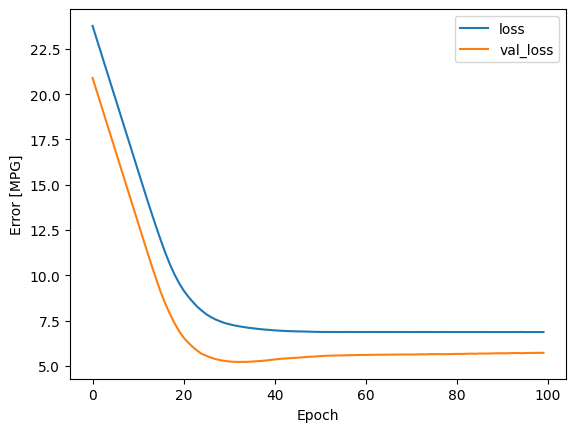

In [22]:
plt.plot(history31.history['loss'], label='loss')
plt.plot(history31.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [23]:
model3_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [24]:
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
%%time
history32 = model3_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 23.7236 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.7976 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 22.0061 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.5744 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.8363 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.3151 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.0392 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.7954 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8685 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.1748 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.1869 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

In [ ]:
hist2 = pd.DataFrame(history32.history)
hist2['epoch'] = history32.epoch
hist2['model'] = 'Model_2'

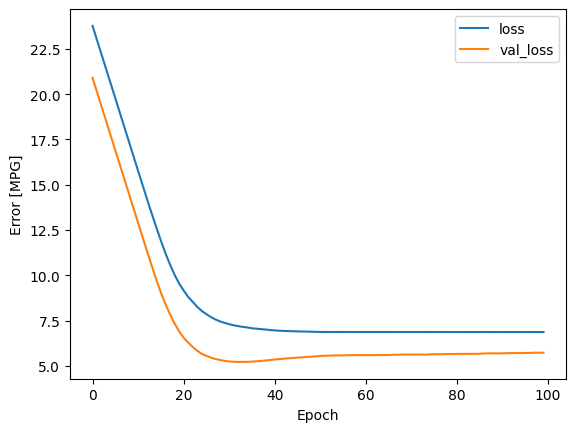

In [26]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [27]:
model3_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [28]:
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [29]:
%%time
history33 = model3_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 23.3806 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.4338 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.4519 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.5259 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3420 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.2621 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.5419 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.5145 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.2531 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.0619 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.9417 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step -

In [37]:
hist3 = pd.DataFrame(history33.history)
hist3['epoch'] = history33.epoch
hist3['model'] = 'Model_3'

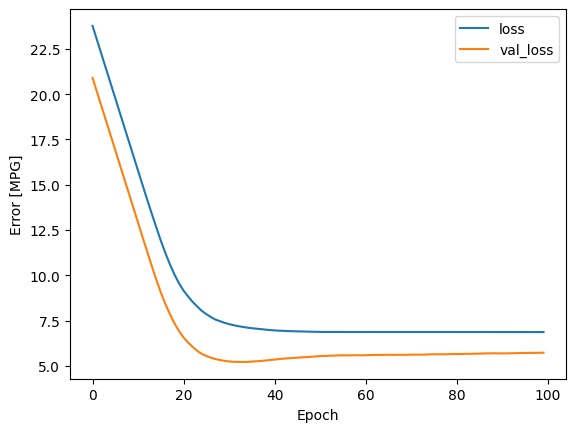

In [30]:
plt.plot(history33.history['loss'], label='loss')
plt.plot(history33.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [38]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [39]:
import seaborn as sns


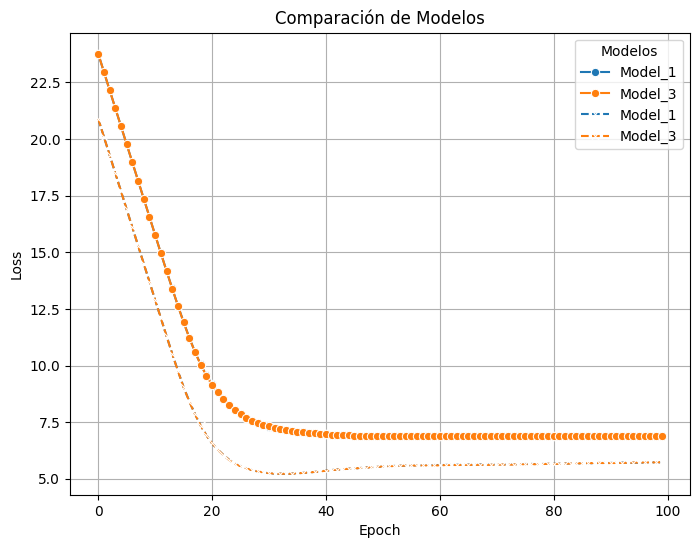

In [ ]:

plt.figure(figsize=(8,6))

# Graficar el loss
sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

In [ ]:

plt.figure(figsize=(8,6))

# Graficar el loss
sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

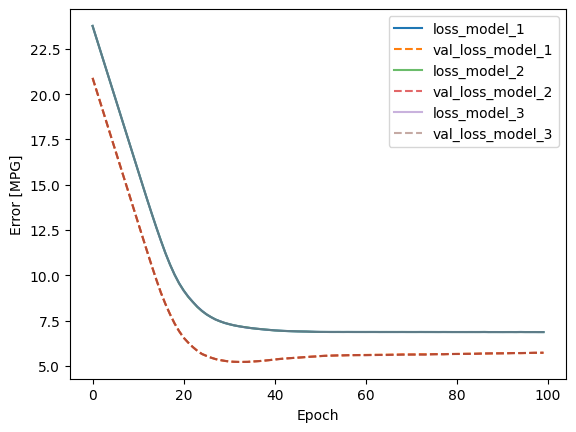

In [31]:
plt.plot(history31.history['loss'], label='loss_model_1', linestyle='solid')
plt.plot(history31.history['val_loss'], label='val_loss_model_1', linestyle='dashed')

plt.plot(history32.history['loss'], label='loss_model_2', linestyle='solid', alpha=0.7)
plt.plot(history32.history['val_loss'], label='val_loss_model_2', linestyle='dashed', alpha=0.7)

plt.plot(history33.history['loss'], label='loss_model_3', linestyle='solid', alpha=0.5)
plt.plot(history33.history['val_loss'], label='val_loss_model_3', linestyle='dashed', alpha=0.5)

plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.show()
